In [2]:
import numpy as np
from matplotlib import pylab as plt
import scipy as sp
from os import listdir,path
from os.path import isfile,join,isdir
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.signal import correlate2d,convolve2d
import math
from scipy import asarray as ar,exp
import pandas as pd
from scipy import ndimage

import seaborn as sns
import sklearn.cluster as cluster
import time
%matplotlib inline
sns.set_context('poster')
sns.set_color_codes()
plot_kwds = {'alpha' : 0.25, 's' : 80, 'linewidths':0}

In [3]:
with open('seed_loc.npy','rb') as f:
    input_data=np.load(f)

In [4]:
input_data.shape
data=input_data[:,:]
data.shape
# print(data[data[:,1]<40])

(1618, 2)

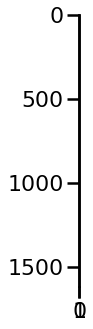

In [6]:
plt.figure(figsize=(5,5))
# plt.scatter(data[data[:,1]<20][:,1],data[data[:,1]<20][:,0],s=5)


In [334]:
def plot_clusters(data, algorithm, args, kwds):
    start_time = time.time()
    labels = algorithm(*args, **kwds).fit_predict(data)
    end_time = time.time()
    palette = sns.color_palette('bright', np.unique(labels).max() + 1)
    colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]
    fig,ax=plt.subplots(1,2,figsize=(29,14))
    ax[0].scatter(data.T[1], data.T[0], c=colors) #, **plot_kwds
    # print(**plot_kwds)
    # frame = plt.gca()
    # frame.axes.get_xaxis().set_visible(False)
    # frame.axes.get_yaxis().set_visible(False)
    print (labels)
    counts = np.bincount(labels[labels>=0])
    print (counts)
    ax[0].set_title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=24)
    ax[0].text(-0.5, 0.01, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=14)
    ax[1].hist(counts,range=(1,10),bins=10)
    fig.tight_layout(pad=3.0)

/usr/local/lib/python3.7/site-packages/sklearn/cluster/_affinity_propagation.py:152: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  FutureWarning)


[  1   2   0   0   1   2   3   3   1   4   4   5   3   5   5   5   5   6
   7   8   9   9  10  10   7  10  11  11  11  12  12  15  12  12  13  14
  12  12  15  12  15  16  17  16  16  17  17  18  19  20  19  20  20  20
  20  21  22  22  23  22  24  25  25  27  28  25  25  29  26  27  27  27
  28  28  28  29  29  30  29  33  31  31  32  33  34  34  33  33  34  31
  35  35  36  39  38  37  37  38  39  39  40  40  41  43  42  42  43  42
  43  44  47  48  45  46  46  47  48  48  46  47  46  49  49  51  50  50
  49  51  50  50  51  52  52  53  54  55  56  55  56  57  58  57  59  58
  61  60  60  61  62  62  62  64  65  63  63  63  64  64  65  67  66  63
  63  64  64  67  66  68  69  68  70  70  70  71  71  74  72  73  74  75
  76  74  77  75  76  76  76  77  77  75  77  77  78  79  80  79  80  80
  81  82  82  83  84  84  82  85  85  85  88  86  87  86  88  88  91  89
  90  91  91  93  93  92  93  95  94  95  96  96  97  96  96  99  95  98
  99  99 100 100  98 102 100 101 101 102 102 103 10

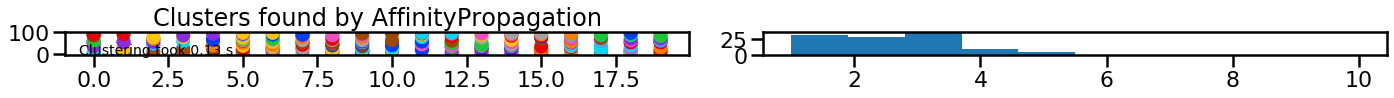

In [329]:
# plot_clusters(frame1, cluster.KMeans, (), {'n_clusters':100})
plot_clusters(data[data[:,1]<20], cluster.AffinityPropagation, (), {'preference':-5.0, 'damping':0.51})


[ 2 14  2  2  2 14 14 14  2  2  2  2 14  2  2  2  2 17 14  2 17 17 17 17
 14 17 18 18 18 18 18 17 18 18 23 23 18 18 17 18 17 23 18 23 23 18 18 18
  4 23  4 23 23 23 23  4  4  4  8  4  8  8  8  4  4  8  8  8  4  4  4  4
  4  4  8  8  8  8  8 10  8  8 10 10  8  8 10 10  8  8 10 10  8 10 10 10
 10 10  7  7  7  7  7  7  7  7 12 12 12  0 12  0  0 12 12 12  0  0 12 12
 12 12 12  0  0  0 12  0  0 15  0 15 15  0 24 15 15 15 15 15 24 15 24 24
 24 27 27 27 27 27 27 11 27 28 28 28 11 11  6  6 28 28 28 11 11  6 28  6
 11  6  6  6  6  5  5  5 11 22  5 25  5  5 25 25  5  5  5 22 22 25 22 22
 25  5 22  5 22 22  1  1  1  1 13 13  1 13 13 13 20 13 13 13 20 20 20 20
 13 20 20  3 19 19 19 21 21 21  3  3  3  3  3 19 21 19 19 19  3  3  3 19
  3 19 19 19 19  9  9 19  9 26 26 16 26 26 16 16 16 16 16 16 16 26 26 16
 16 16]
[12  5 13 10 14 11  8  8 19  3 12  7 13  9  7  9 11  9 14 13  7  4  8 10
  5  5  6  7  7]


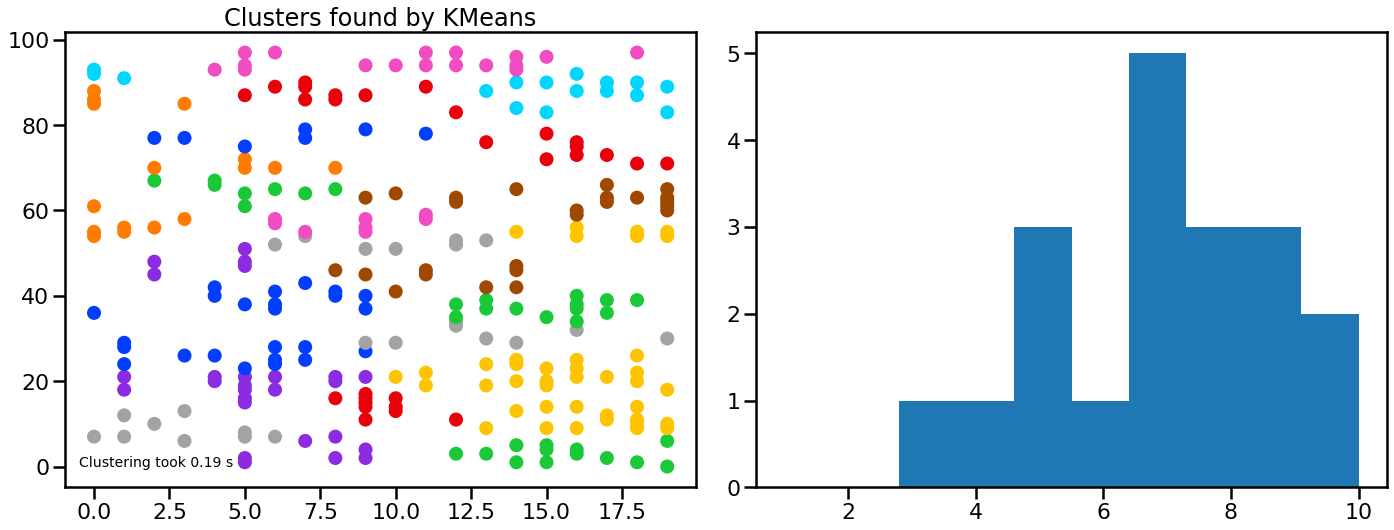

In [324]:
plot_clusters(data[data[:,1]<20], cluster.KMeans, (), {'n_clusters':29})


[13  1 13 13 13  1  1  1 13 13 13 13  1 13 13 13 13 23  1  6 23 23  1  1
  1  1  6  6  6  6  6 23  6  6 21  6  6  6 23  6 23 21  6 21 21  6  6  6
 12 21 12 21 21 21 21 12 12 12 18 12 18 18 18 12 27 18 18 18 12 12 12 12
 27 27 27 18 18 27 18  9 29 29 28  9 29 29  9  9 29 29 28 28 29  9 28  9
  9 28  9  9 24 24 24 24  0  0 24  0 24  3  0  3  3  0  0  0  3  3  0  0
  0  0  0  3  3  3  0  3  3  3  3 19 19  3 22 19 19 19 19 19 22 19 22 22
  7  7  7  7  7  7  7  5  7 17 17 17  5  5  7  7 17 17 17  5  5  7 17  5
  5  5 11 11 11 20 20 20  5  5 20 11 20 20 11 11 20 20 20  2  2 11  2  2
 11 20  2 20  2  2  2  2  2  2 14 14  2 14 14 14  8 14 14 14  8  8  8  8
 14  8  8 26 26 26 26 16 16 16 25 25 16 25 25 10 16 10 10 10 25 25 10 10
 25 10 10 10 10  4  4 10  4  4  4 15  4 15 15 15 15 15 15 15 15  4  4 15
 15 15]
[13 10 12 13  8 10 16 11  7  9 11  8 11 12  9 12  5  7 10  8 11  9  4  6
  6  7  4  5  5  7]


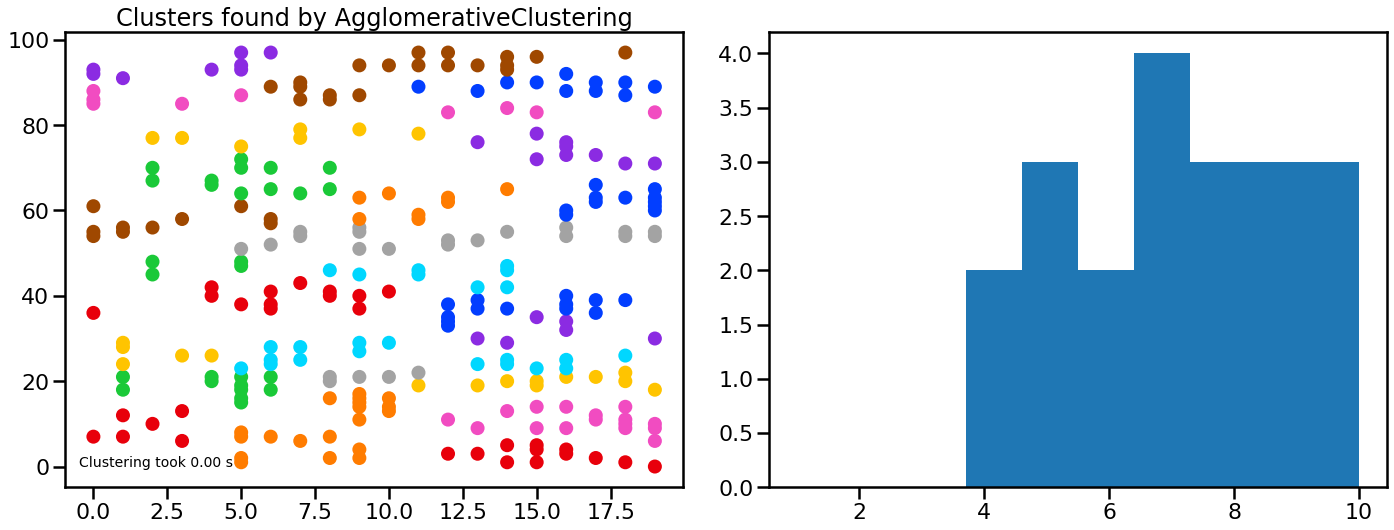

In [325]:
plot_clusters(data[data[:,1]<20], cluster.AgglomerativeClustering, (), {'n_clusters':30, 'linkage':'ward'})


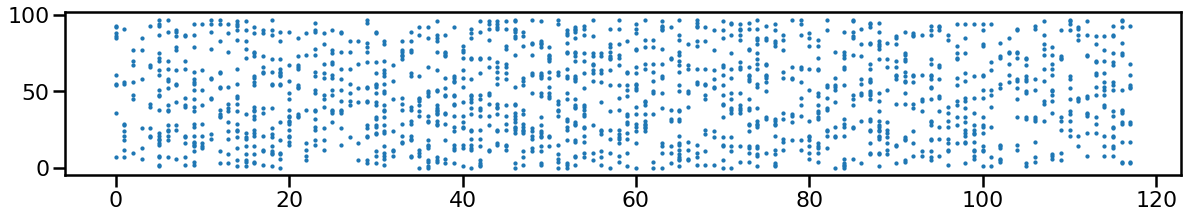

In [327]:
plt.figure(figsize=(20,3))
plt.scatter(data[:,1],data[:,0],s=5)

[  0   1   1 ... 681 683 685]
[ 8  3  5  1  2  1  2  2  2  5  2  2  1  1  3  1  2  1  2  3  2  2  4  1
  3  1  2  8  1  1  3  1  2  4  1  1  1  2  1  4  1  2  1  1  6  1  1  2
  1  5  1  1  1  1  2  1  2  3  1  3  1  4  1  1  3  1  5  1  3  1  2  1
  2  7  1  3  5  1  4  1  4  1  2  2  1  1  2  3  1  2  2  4  1  1  1  4
  9  1  2  2  1  1  1  1  8  3  4  8  4  3  3  1  1  4  5  3  1  1  2  1
  2  1  1  1  1  4  1  1  1  1  1  1  5  2  4  5  1  2  1  7  2  1  1  3
  4  1  8  2  6  4  4  5  2  1  7  3  2  4  3  1  2  1  1  1  5  2  1  4
  1  4  5 15  6  2  1  1  6  4  2  1  2  1  1  1  3  1  2  2  2  1  1  5
  9  8  4  2  1  5  2  4  4  2  2  6  1  1  2  2  2  4  2  3  1  1  4  1
  1  1  5  2  1  1  1  4  6  3  1  7  2  1  1  3  1  1  3  5  1  1  2  1
  1  4  2 19  1  2  5  4  1  1  1  6  6  2  4  2  1  1  4  3  1  4  3  2
  3  2  2  4  1  1  1  1  3  1  6  7  7  1  1  1  4  1  2  2  1  2  1  2
  1  1  2  1  4  2  1  1  1  1  1  2  1  1  3  1  1  6  1  2  1  4  3  2
  5  2  2  8  1  2  2

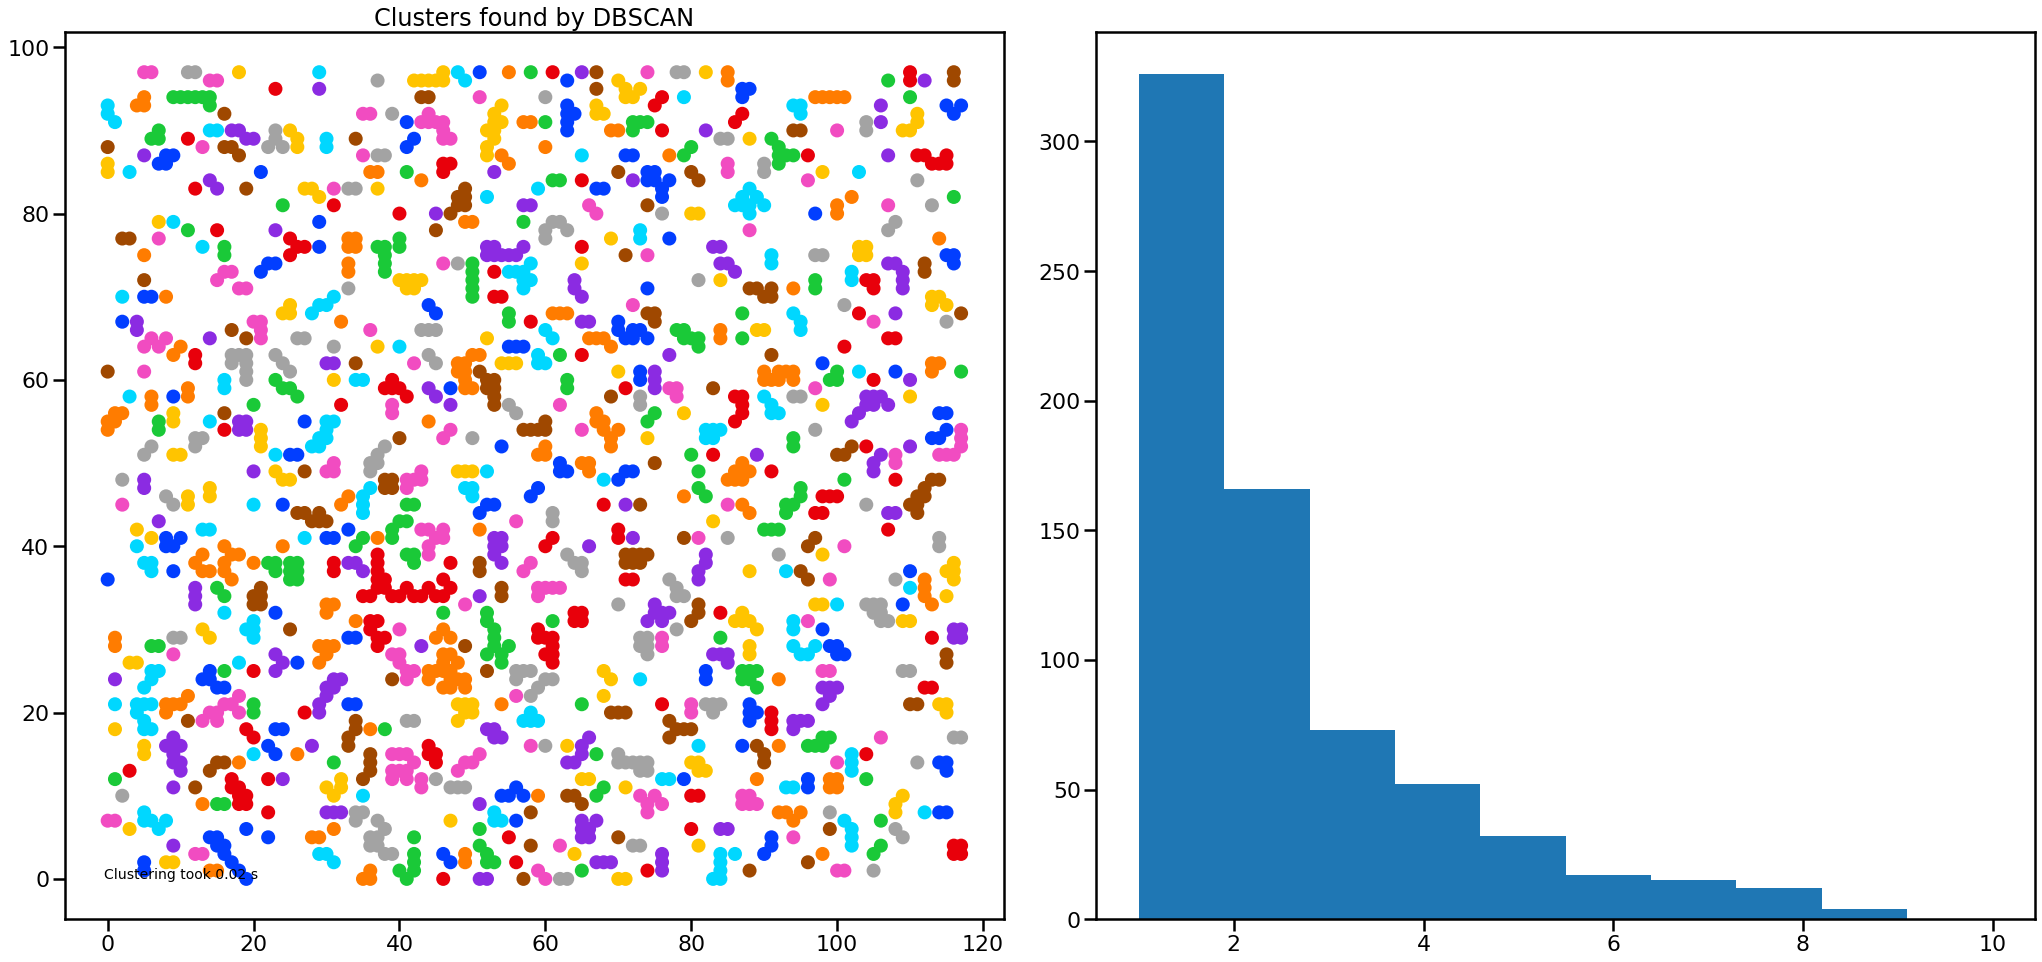

In [340]:
_=plot_clusters(data, cluster.DBSCAN, (), {'min_samples':1,'eps':1.5})


[  0   1   2   3   4   5   6   4   7   8   9   9  10  11  12   9   9   9
  10  13  14  15  16  13  17  18  19  20  21  19  22  23  24  25  26  27
  28  29  26  30  31  32  33  30  31  34  35  36  30  37  30  38  37  30
  39  39  40  41  42  43  39  39  44  45  39  39  44  39  39  39  46  47
  44  48  49  50  51  52  52  53  53  51  54  55  56  54  57  58  59  60
  61  57  62  63  64  65  64  66  67  68  65  69  70  71  72  73  74  73
  75  74  76  73  77  78  79  77  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  93  96  97  98  99 100 101 101  96  97 102  98
 103 104 105 102  98 106 106 107 108 102 106 109 109]
[1 1 1 1 2 1 1 1 1 5 2 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 5 2 1 1 1 1 1
 2 1 9 1 1 1 1 3 1 1 1 1 1 1 2 2 2 2 1 1 2 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 3
 2 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 2 3 1 1 2 3 1 1 1 3 1 1 2]


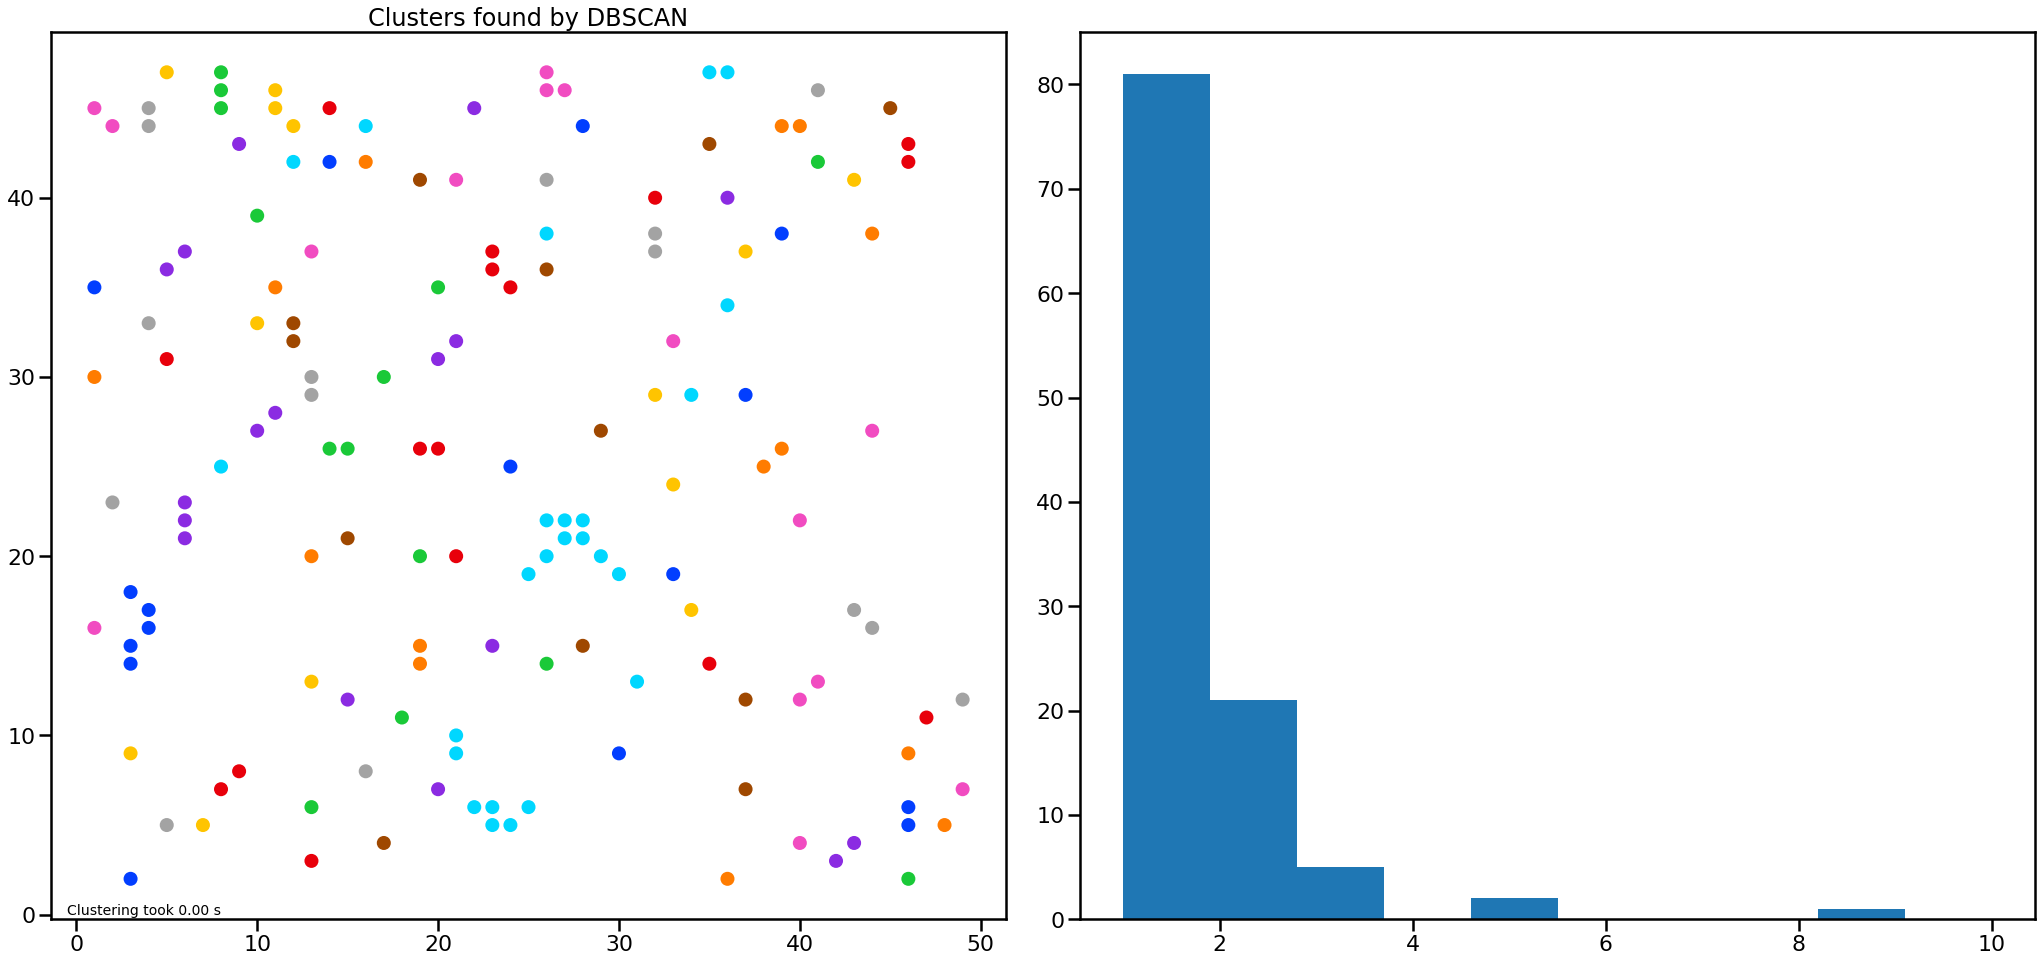

In [342]:
with open('../seedloc/seed_loc40kGyneg20C.npy','rb') as f:
    input_data=np.load(f)
plot_clusters(input_data, cluster.DBSCAN, (), {'min_samples':1,'eps':1.5})


[  0   1   0   0   2   3   4   5   6   7   8   8   9   0  10  10   8   8
  11  10  10  10  10  12  13  10  10  10  10  14  14  15  10  10  16  14
  14  17  17  18  10  14  14  19  10  20  21  22  14  14  23  24  21  25
  22  14  14  26  26  27  28  25  29  26  27  30  31  32  33  34  35  35
  36  32  33  37  38  34  35  35  35  39  40  40  41  41  35  35  42  39
  43  43  44  43  45  46  46  43  45  47  48  49  50  51  47  48  52  53
  50  54  48  52  53  53  53  50  54  52  52  53  53  50  55  56  56  52
  57  57  53  53  53  53  50  58  53  59  59  60  60  58  58  58  61  61
  62  63  64  65  66  60  58  58  61  61  67  67  62  62  68  64  69  62
  62  68  64  70  71  71  71  71  71  72  62  62  68  64  70  73  74  71
  71  71  62  71  75  76  77  78  79  79  80  76  81  82  83  84  84  85
  86  87  88  88  84  89  90  89  89  90  91  92  93  94  95  96  97  97
  91  92  98  97  99  92  92 100 100  97  97  97  97  92  92 101  97  97
  92 102 102  97  97 103 103 104 105 106 102 107 10

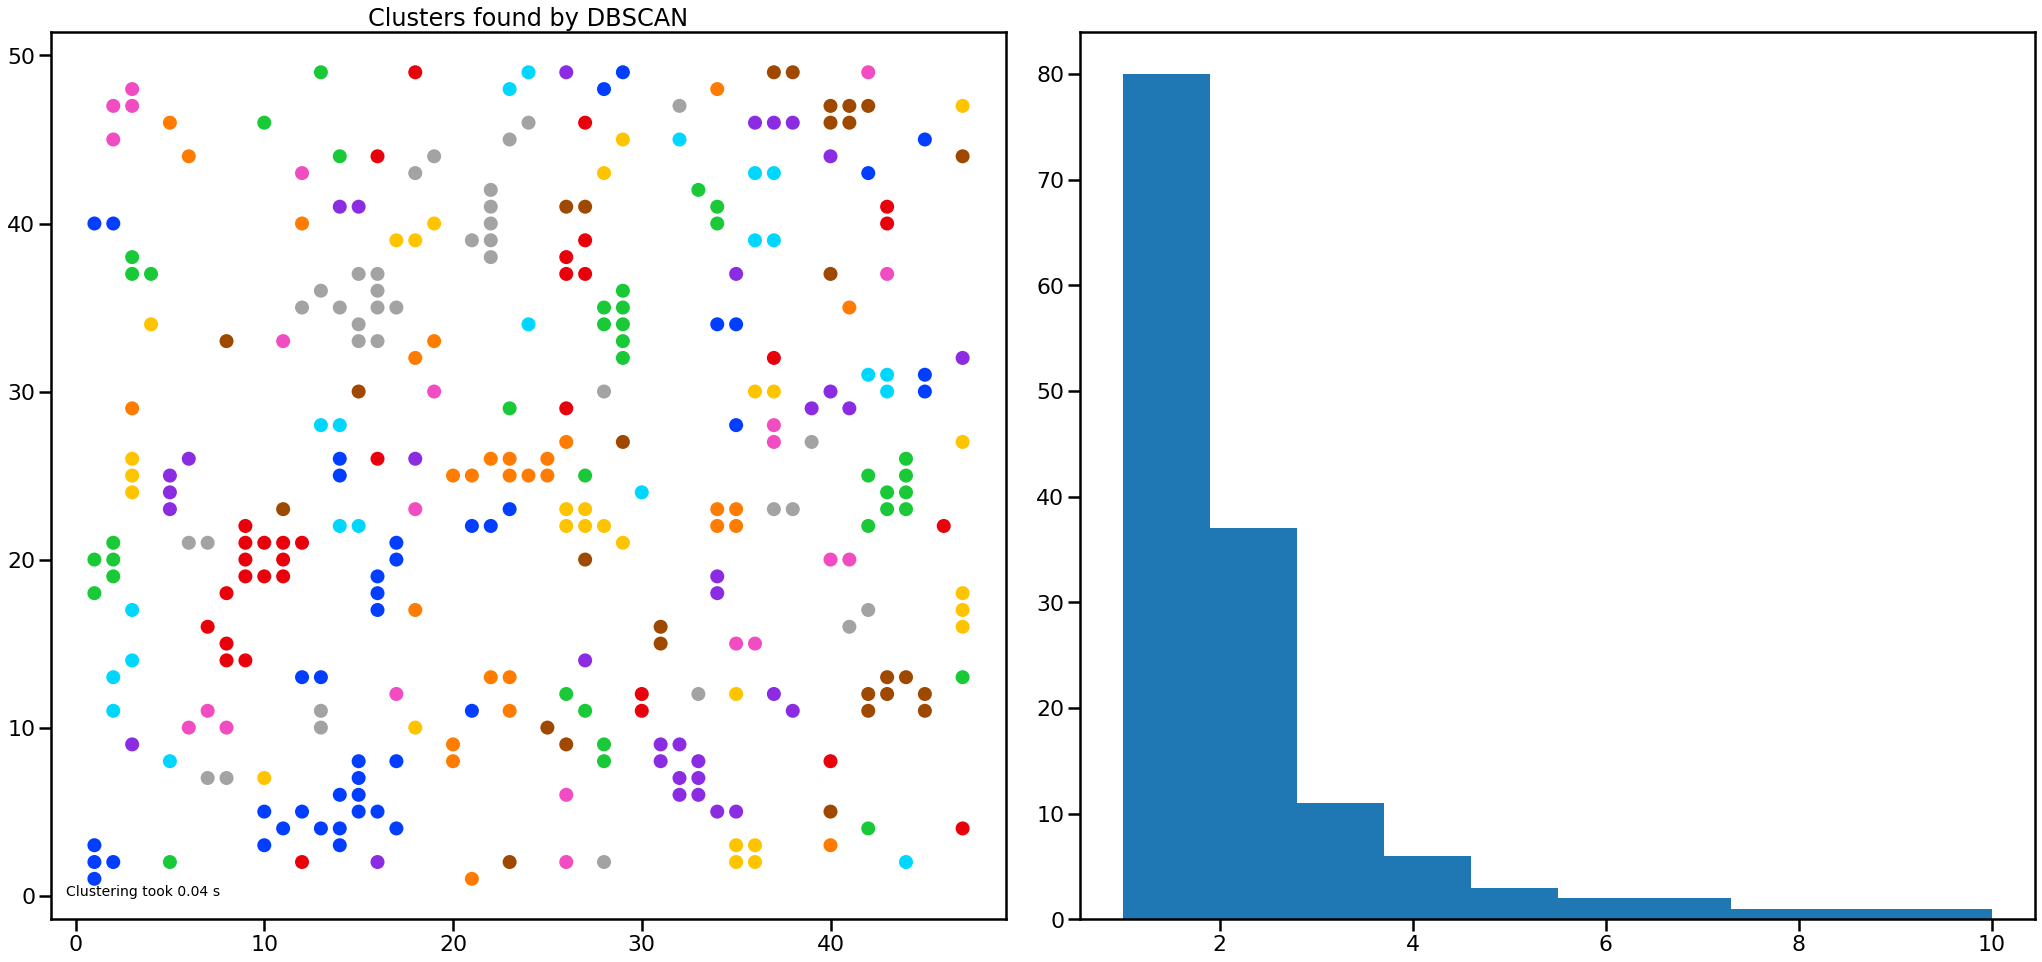

In [345]:
with open('../seedloc/seed_loc0kGyneg20C.npy','rb') as f:
    input_data0_20=np.load(f)
plot_clusters(input_data0_20, cluster.DBSCAN, (), {'min_samples':1,'eps':1.5})
